Importing Liabrary

In [38]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

Loading data ...

In [17]:
data = pd.read_csv('train.csv')

Data Exploration

Extracting month becase seasons impact on air quality
also hour weekdays and days in month

In [18]:
month = pd.DatetimeIndex(data['date_time']).month
hour = pd.DatetimeIndex(data['date_time']).hour
day = pd.DatetimeIndex(data['date_time']).weekday
date = pd.DatetimeIndex(data['date_time']).day

added to data

In [19]:
data["month"]=month
data["hour"]=hour 
data["weekdays"]=day
data['date']=date
data.drop("date_time",axis=1,inplace =True) 
data.head(1)

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,month,hour,weekdays,date
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7,3,18,2,10


remove outliers

In [20]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = (q3-q1)*1.5
data = data[~((data<(q1-iqr))|(data>(q3+iqr))).any(axis=1)]

C:\Users\Prashant Patil\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


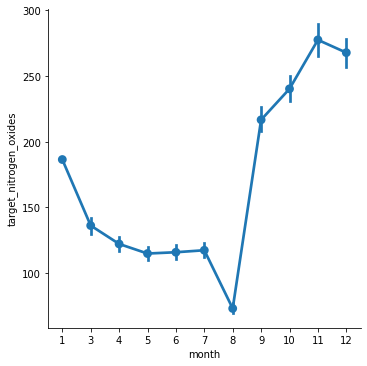

In [21]:
sns.factorplot(x="month",y="target_nitrogen_oxides",data=data)

C:\Users\Prashant Patil\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


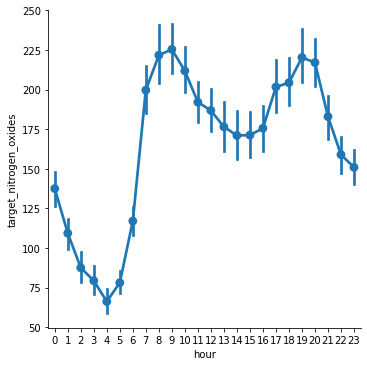

In [22]:
sns.factorplot(x="hour",y="target_nitrogen_oxides",data=data)

C:\Users\Prashant Patil\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


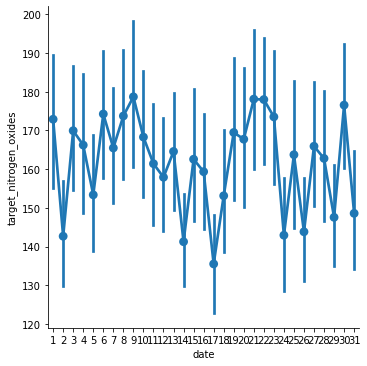

In [23]:
sns.factorplot(x="date",y="target_nitrogen_oxides",data=data)

<AxesSubplot:>

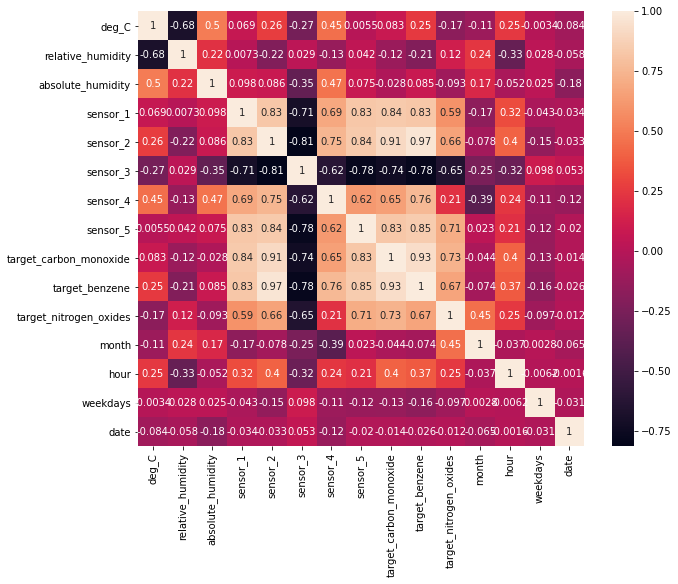

In [24]:
plt.figure(figsize=(10,8)) 
sns.heatmap(data.corr(),annot=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6108 entries, 0 to 7110
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   deg_C                   6108 non-null   float64
 1   relative_humidity       6108 non-null   float64
 2   absolute_humidity       6108 non-null   float64
 3   sensor_1                6108 non-null   float64
 4   sensor_2                6108 non-null   float64
 5   sensor_3                6108 non-null   float64
 6   sensor_4                6108 non-null   float64
 7   sensor_5                6108 non-null   float64
 8   target_carbon_monoxide  6108 non-null   float64
 9   target_benzene          6108 non-null   float64
 10  target_nitrogen_oxides  6108 non-null   float64
 11  month                   6108 non-null   int64  
 12  hour                    6108 non-null   int64  
 13  weekdays                6108 non-null   int64  
 14  date                    6108 non-null   

columns to remove

In [29]:
c = ["target_carbon_monoxide","target_benzene","target_nitrogen_oxides"]

In [30]:
x = data.drop(c,axis=1)
y = data[c]

In [31]:
y.head()

,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2.5,12.0,167.7
1,2.1,9.9,98.9
2,2.2,9.2,127.1
3,2.2,9.7,177.2
4,1.5,6.4,121.8


In [32]:
sc =StandardScaler()

In [34]:
x = sc.fit_transform(x)

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

In [39]:
ypre = MultiOutputRegressor(LinearRegression())

In [40]:
ypre.fit(xtrain,ytrain) 

MultiOutputRegressor(estimator=LinearRegression())

In [41]:
ypred = ypre.predict(xtest)

In [47]:
mean_squared_error(ypred,ytest)

829.7407537342197